<a href="https://colab.research.google.com/github/ManjuVijayakumar/ICTAK_DSA_FinalProject/blob/main/Crop_Yield_prediction_regression_task_feature_analysis_manju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Display all columns
pd.set_option('display.max_columns', None)

pd.set_option('display.float_format', '{:.5f}'.format)

In [ ]:
# Loading the dataset
file_url= 'https://raw.githubusercontent.com/ManjuVijayakumar/ICTAK_DSA_FinalProject/refs/heads/main/crop_yield_main.csv'
yield_df = pd.read_csv(file_url, index_col= 'Unnamed: 0')

# First 5 rows
yield_df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Country,Soil_type,Annual_mean_temp,Apr_temp,Aug_temp,Dec_temp,Feb_temp,Jan_temp,Jul_temp,Jun_temp,Mar_temp,May_temp,Monsoon_temp,Nov_temp,Oct_temp,Post_Monsoon_temp,Sep_temp,Summer_temp,Winter_temp,JAN_rain,FEB_rain,MAR_rain,APR_rain,MAY_rain,JUN_rain,JUL_rain,AUG_rain,SEP_rain,OCT_rain,NOV_rain,DEC_rain,Jan-Feb_rain,Mar-May_rain,Jun-Sep_rain,Oct-Dec_rain
0,Arecanut,1997,Whole Year,Assam,73814.00000,56708,2372.20000,7024878.38000,22882.34000,0.79609,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
1,Arhar/Tur,1997,Kharif,Assam,6637.00000,4685,2372.20000,631643.29000,2057.47000,0.71043,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
2,Castor seed,1997,Kharif,Assam,796.00000,22,2372.20000,75755.32000,246.76000,0.23833,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
3,Coconut,1997,Whole Year,Assam,19656.00000,126905000,2372.20000,1870661.52000,6093.36000,5238.05174,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000
4,Cotton(lint),1997,Kharif,Assam,1739.00000,794,2372.20000,165500.63000,539.09000,0.42091,India,alluvial,22.54000,22.19000,27.55000,16.67000,16.84000,15.53000,27.16000,26.37000,21.93000,25.28000,26.78000,21.11000,23.88000,20.55000,26.02000,23.13000,16.19000,18.20000,40.70000,91.80000,131.90000,241.80000,569.90000,511.20000,315.50000,366.80000,36.40000,12.60000,35.40000,58.90000,465.60000,1763.40000,84.30000


In [ ]:
# Last 5 rows
yield_df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Country,Soil_type,Annual_mean_temp,Apr_temp,Aug_temp,Dec_temp,Feb_temp,Jan_temp,Jul_temp,Jun_temp,Mar_temp,May_temp,Monsoon_temp,Nov_temp,Oct_temp,Post_Monsoon_temp,Sep_temp,Summer_temp,Winter_temp,JAN_rain,FEB_rain,MAR_rain,APR_rain,MAY_rain,JUN_rain,JUL_rain,AUG_rain,SEP_rain,OCT_rain,NOV_rain,DEC_rain,Jan-Feb_rain,Mar-May_rain,Jun-Sep_rain,Oct-Dec_rain
19684,Small millets,1998,Kharif,Nagaland,4000.00000,2000,2225.40000,395200.00000,1160.00000,0.50000,India,red,19.37000,19.44000,22.98000,14.60000,14.53000,12.37000,22.76000,22.94000,16.07000,22.30000,22.98000,18.51000,22.77000,18.63000,23.24000,19.27000,13.45000,28.10000,31.60000,136.40000,164.60000,352.20000,297.60000,480.60000,367.30000,222.30000,97.90000,46.50000,0.30000,59.70000,653.20000,1367.90000,144.70000
19685,Wheat,1998,Rabi,Nagaland,1000.00000,3000,2225.40000,98800.00000,290.00000,3.00000,India,red,19.37000,19.44000,22.98000,14.60000,14.53000,12.37000,22.76000,22.94000,16.07000,22.30000,22.98000,18.51000,22.77000,18.63000,23.24000,19.27000,13.45000,28.10000,31.60000,136.40000,164.60000,352.20000,297.60000,480.60000,367.30000,222.30000,97.90000,46.50000,0.30000,59.70000,653.20000,1367.90000,144.70000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.00000,440900,1295.90000,29586735.11000,96373.73000,1.28500,India,alluvial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.40000,55.60000,164.10000,144.50000,89.10000,81.20000,126.60000,270.20000,75.40000,77.30000,84.30000,59.20000,124.00000,397.70000,553.40000,220.80000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.00000,5488,1295.90000,26242746.82000,85481.26000,0.01667,India,alluvial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.40000,55.60000,164.10000,144.50000,89.10000,81.20000,126.60000,270.20000,75.40000,77.30000,84.30000,59.20000,124.00000,397.70000,553.40000,220.80000
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.00000,392160,1295.90000,22778368.48000,74196.64000,1.26182,India,alluvial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.40000,55.60000,164.10000,144.50000,89.10000,81.20000,126.60000,270.20000,75.40000,77.30000,84.30000,59.20000,124.00000,397.70000,553.40000,220.80000


In [ ]:
# Shape of the dataset
print('Dataset has {} row and {} columns'.format(yield_df.shape[0], yield_df.shape[1]))

Dataset has 19689 row and 45 columns


In [ ]:
# Dataset Information
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19689 entries, 0 to 19688
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Crop               19689 non-null  object 
 1   Crop_Year          19689 non-null  int64  
 2   Season             19689 non-null  object 
 3   State              19689 non-null  object 
 4   Area               19689 non-null  float64
 5   Production         19689 non-null  int64  
 6   Annual_Rainfall    19689 non-null  float64
 7   Fertilizer         19689 non-null  float64
 8   Pesticide          19689 non-null  float64
 9   Yield              19689 non-null  float64
 10  Country            19689 non-null  object 
 11  Soil_type          19689 non-null  object 
 12  Annual_mean_temp   18661 non-null  float64
 13  Apr_temp           18661 non-null  float64
 14  Aug_temp           18661 non-null  float64
 15  Dec_temp           18661 non-null  float64
 16  Feb_temp           18661 no

In [ ]:
print('No of numeric columns : {} '.format(len(yield_df.select_dtypes(include = np.number).columns)))
print('No of categorical columns : {} '.format(len(yield_df.select_dtypes(include= 'object').columns)))


No of numeric columns : 40 
No of categorical columns : 5 


In [ ]:
# Missing values
print('Total no. of missing values : {}'.format(yield_df.isnull().sum().sum()))

Total no. of missing values : 61732


In [ ]:
# yield_df.columns

### Bookmark1-Manju

**Analyzing Features: Crop, Crop_Year, Season, State, Area, Production, Annual_Rainfall, Fertilizer, Pesticide, Yield, Country, Soil_type**

In [ ]:
data= yield_df[['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Country',
       'Soil_type']]
data.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Country',
       'Soil_type'],
      dtype='object')

In [ ]:
# Missing Values
data.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [ ]:
# Duplicates
data.duplicated().sum()

np.int64(0)

In [ ]:
# Statistical Analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,19689.00000,2009.12758,6.49810,1997.00000,2004.00000,2010.00000,2015.00000,2020.00000
Area,19689.00000,179926.57031,732828.67589,0.50000,1390.00000,9317.00000,75112.00000,50808100.00000
Production,19689.00000,16435941.27310,263056839.81257,0.00000,1393.00000,13804.00000,122718.00000,6326000000.00000
Annual_Rainfall,19689.00000,2116.54624,1436.68884,274.70000,1194.70000,1633.00000,2468.30000,7155.30000
Fertilizer,19689.00000,24103312.44881,94946004.48253,54.17000,188014.62000,1234957.44000,10003847.20000,4835406877.00000
Pesticide,19689.00000,48848.35339,213287.35486,0.09000,356.70000,2421.90000,20041.70000,15750511.00000
Yield,19689.00000,79.95401,878.30619,0.00000,0.60000,1.03000,2.38889,21105.00000


In [ ]:
data.describe(include= 'object').T

,count,unique,top,freq
Crop,19689,55,Rice,1197
Season,19689,6,Kharif,8232
State,19689,30,Karnataka,1432
Country,19689,1,India,19689
Soil_type,19689,7,alluvial,7437


**Insights**

* Dataset has 19689 row and 45 columns
* Categorical: 5 and Numerical: 40
* Total no. of missing values : 61732
* Statistical summary of first 12 columns shows presence of positive skewness in Area, Production, Annual_Rainfall, Fertilizer, Pesticide and Yield



### **Univariate Analysis**
It's the study of single variable in dataset. The underlying distribution of variable can be analyzed.

In [ ]:
# Categorical columns
cat_cols= data.select_dtypes(include= 'object').columns

# Numerical columns
num_cols= data.select_dtypes(include= np.number).columns

In [ ]:
# Categorical column analysis
for feature in cat_cols:
  print(data[feature].value_counts(),'\n')

Crop
Rice                     1197
Maize                     975
Moong(Green Gram)         740
Urad                      733
Groundnut                 725
Sesamum                   685
Potato                    628
Sugarcane                 605
Wheat                     545
Rapeseed &Mustard         528
Bajra                     524
Jowar                     513
Arhar/Tur                 508
Ragi                      498
Gram                      490
Small millets             485
Cotton(lint)              476
Onion                     454
Sunflower                 441
Dry chillies              419
Other Kharif pulses       382
Horse-gram                371
Peas & beans (Pulses)     369
Tobacco                   364
Other  Rabi pulses        355
Soyabean                  349
Turmeric                  337
Masoor                    324
Ginger                    323
Linseed                   308
Castor seed               300
Barley                    297
Sweet potato              273
Garli

In [ ]:
# Country has unique value. This unique feature will be irrelevant to the model's predictive performance and can be ignored/dropped
# Country

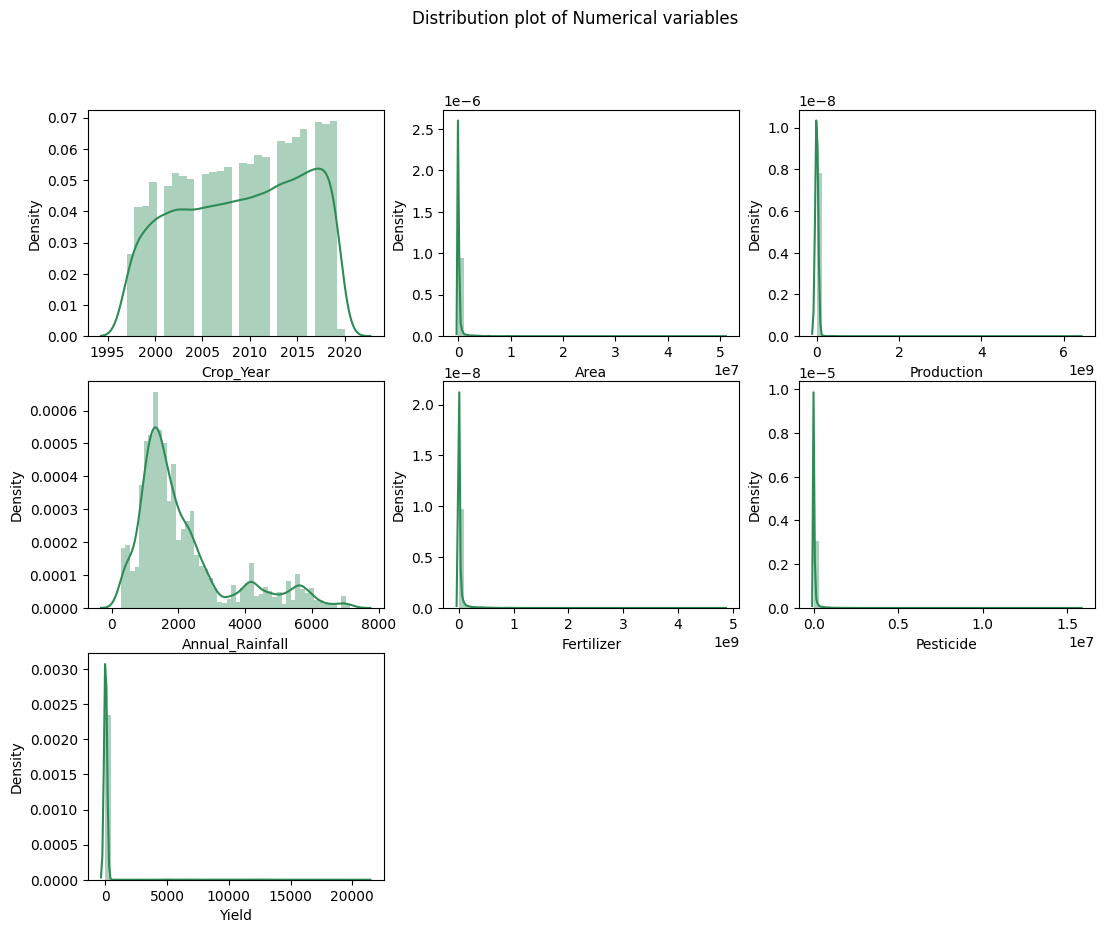

In [ ]:
fig, ax= plt.subplots(3, 3, figsize= (13, 10))
ax= ax.flatten()

for i, c in enumerate(data[num_cols]):
  sns.distplot(x= data[c], ax= ax[i], axlabel= c, color= 'seagreen')
plt.delaxes(ax[7])
plt.delaxes(ax[8])
plt.suptitle('Distribution plot of Numerical variables')
plt.show()

In [ ]:
for feat in data[num_cols]:
  print(feat,'',data[feat].skew())

Crop_Year  -0.16265562121556904
Area  21.858217797355426
Production  19.299193411606723
Annual_Rainfall  1.4591116050304829
Fertilizer  13.412598810025766
Pesticide  25.635746086843607
Yield  12.785264685628691


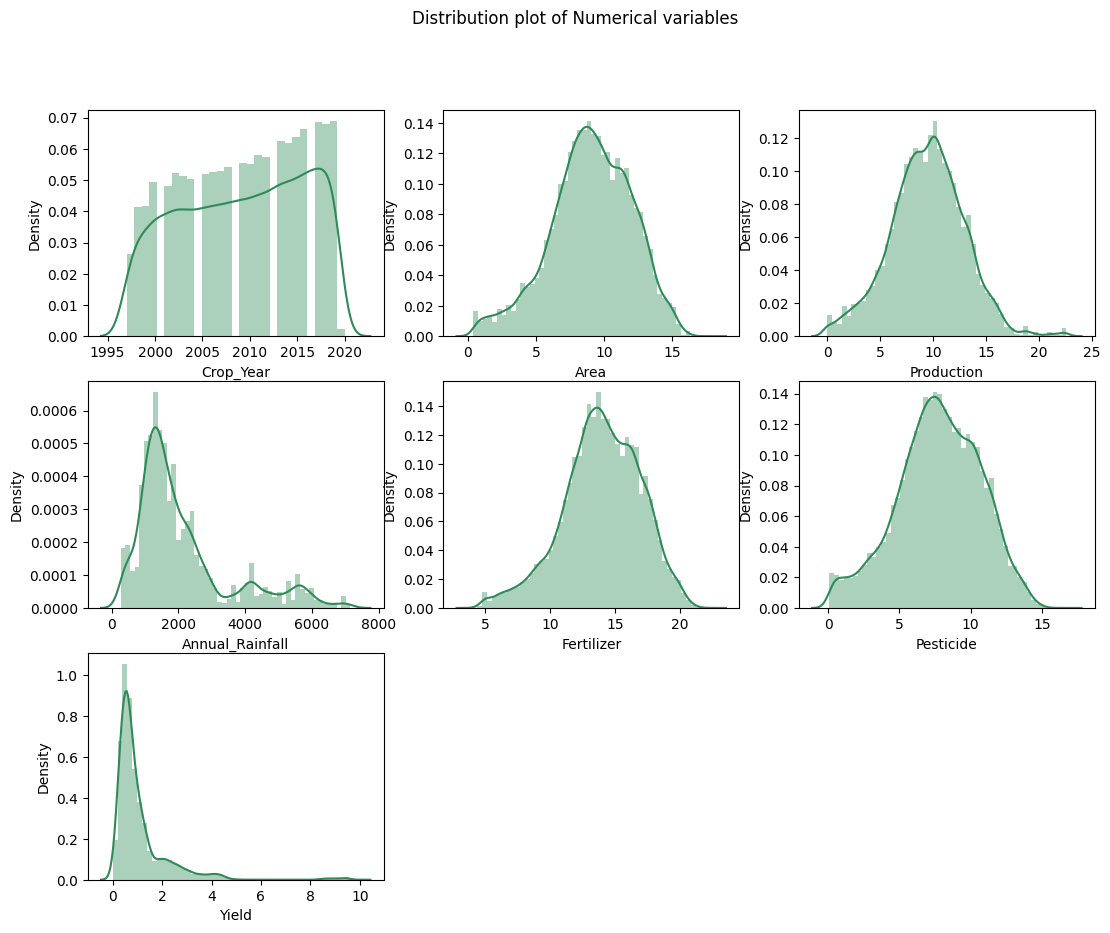

In [ ]:
fig, ax= plt.subplots(3, 3, figsize= (13, 10))
ax= ax.flatten()

for i, c in enumerate(data[num_cols]):
  if c in ['Crop_Year', 'Annual_Rainfall']:
    sns.distplot(x= data[c], ax= ax[i], axlabel= c, color= 'seagreen')
  else:
    sns.distplot(x= np.log1p(data[c]), ax= ax[i], axlabel= c, color= 'seagreen')
plt.delaxes(ax[7])
plt.delaxes(ax[8])
plt.suptitle('Distribution plot of Numerical variables')
plt.show()

In [ ]:
cat_cols

Index(['Crop', 'Season', 'State', 'Country', 'Soil_type'], dtype='object')

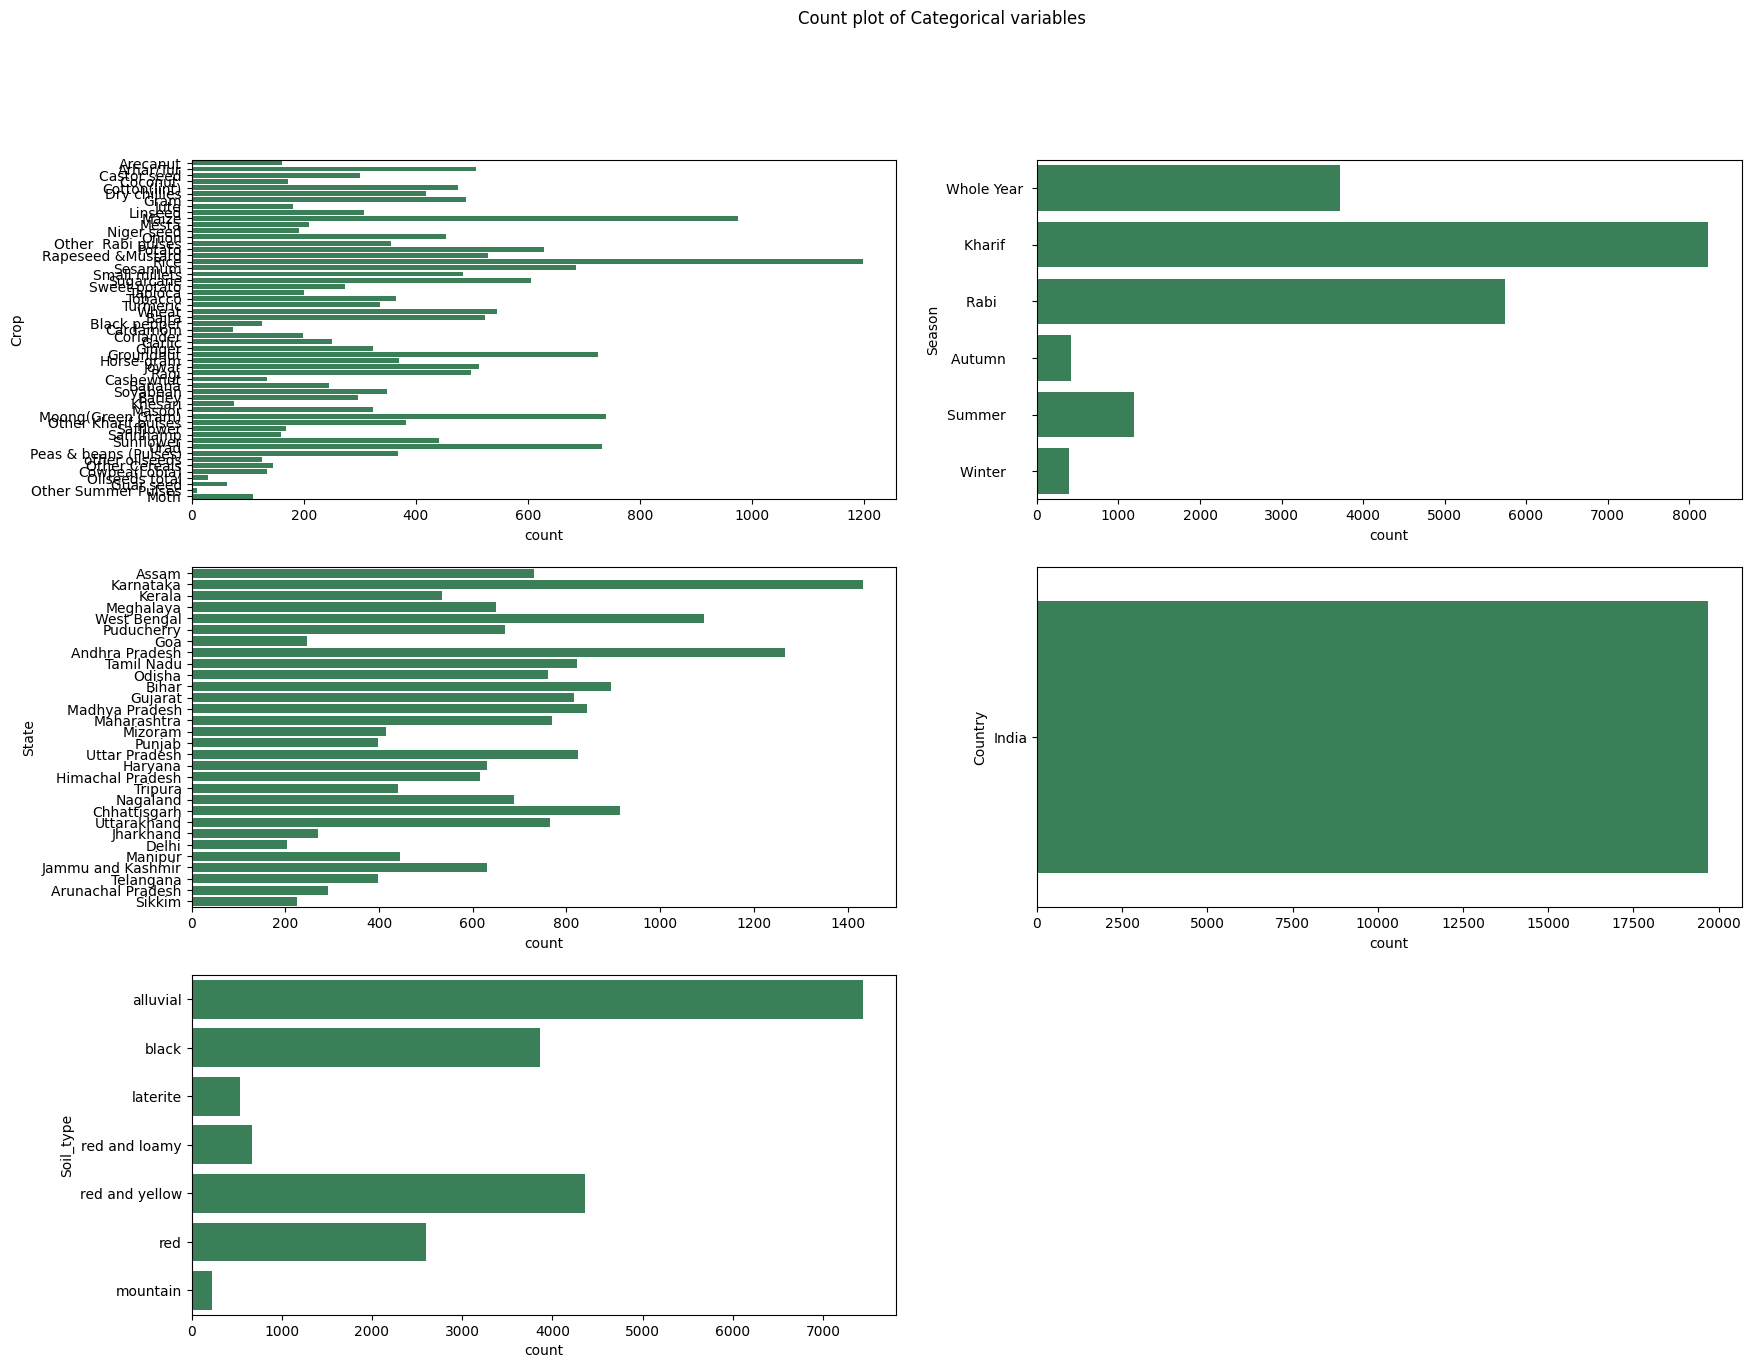

In [ ]:
fig, ax= plt.subplots(3, 2, figsize= (20, 15))
ax= ax.flatten()

for i, c in enumerate(data[cat_cols]):
  sns.countplot(y= data[c], ax= ax[i], color= 'seagreen')
  # ax[i].tick_params(axis='x', labelrotation=90)
plt.delaxes(ax[5])
plt.suptitle('Count plot of Categorical variables')

plt.show()

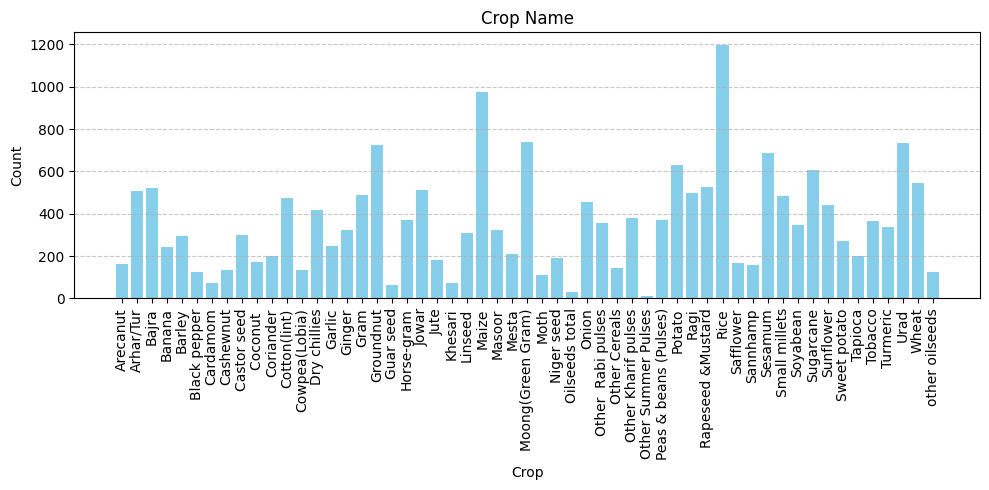

In [ ]:
# Count details for each crop. Top 10

crop_counts= yield_df.Crop.value_counts().sort_index()

plt.figure(figsize= (10, 5))
plt.bar(crop_counts.index, crop_counts.values, color= 'skyblue')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.title('Crop Name')
plt.xticks(rotation= 90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insights**

*   Country has unique value. This unique feature will be irrelevant to the model's predictive performance and can be ignored/dropped
*   Distribution plot shows features Area, Production, Fertilizer, Pesticide and Yield are highly positively skewed.
*   Log transformation applied to features that are highly skewed. Log-transforming it helps stabilize variance, reduce skewness, and makes relationships with predictors more linear, which is better for visualization, correlation and modeling.





### **Bivariate Analysis**
Its the statistical method to analyze the relationship between two features.

In [ ]:
cat_cols

Index(['Crop', 'Season', 'State', 'Country', 'Soil_type'], dtype='object')

In [ ]:
num_cols

Index(['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide', 'Yield'],
      dtype='object')

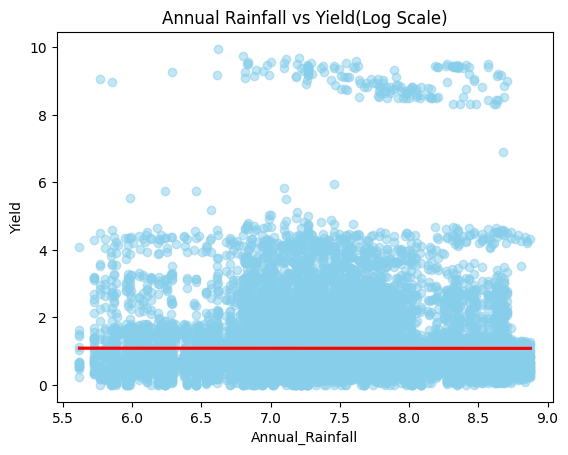

In [ ]:
# Annual Rainfall vs Yield
sns.regplot (
    x= np.log1p(data.Annual_Rainfall),
    y= np.log1p(data.Yield),
    scatter_kws= {'alpha':0.5, 'color':'skyblue'},
    line_kws= {'color':'red'}
)
plt.title('Annual Rainfall vs Yield(Log Scale)')
plt.show()

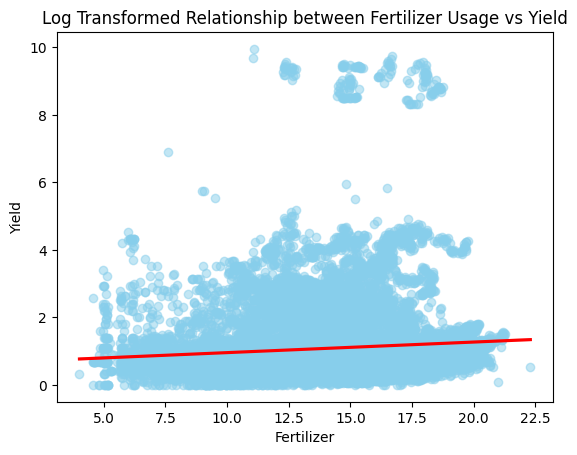

In [ ]:
# Fertilizer vs Yield
sns.regplot (
    x= np.log1p(data.Fertilizer),
    y= np.log1p(data.Yield),
    scatter_kws= {'alpha':0.5, 'color':'skyblue'},
    line_kws= {'color':'red'}
)
plt.title('Log Transformed Relationship between Fertilizer Usage vs Yield')
plt.show()

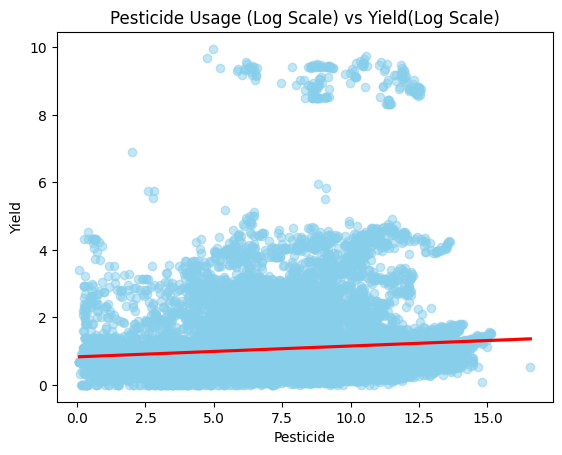

In [ ]:
sns.regplot (
    x= np.log1p(data.Pesticide),
    y= np.log1p(data.Yield),
    scatter_kws= {'alpha':0.5, 'color':'skyblue'},
    line_kws= {'color':'red'}
)
plt.title('Pesticide Usage (Log Scale) vs Yield(Log Scale)')
plt.show()

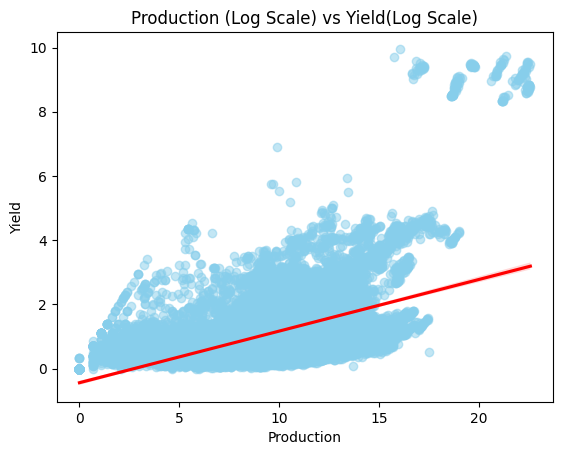

In [ ]:
sns.regplot (
    x= np.log1p(data.Production),
    y= np.log1p(data.Yield),
    scatter_kws= {'alpha':0.5, 'color':'skyblue'},
    line_kws= {'color':'red'}
)
plt.title('Production (Log Scale) vs Yield(Log Scale)')
plt.show()

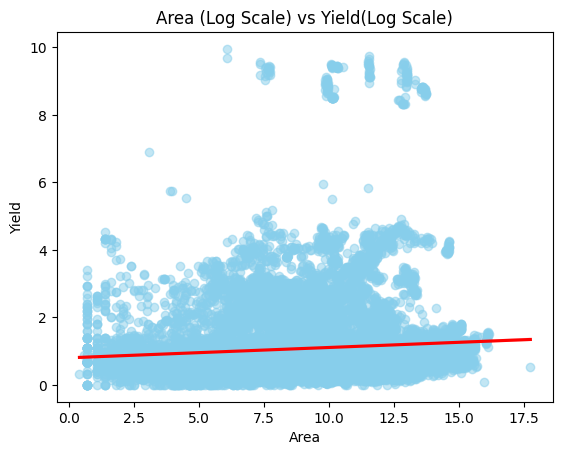

In [ ]:
sns.regplot (
    x= np.log1p(data.Area),
    y= np.log1p(data.Yield),
    scatter_kws= {'alpha':0.5, 'color':'skyblue'},
    line_kws= {'color':'red'}
)
plt.title('Area (Log Scale) vs Yield(Log Scale)')
plt.show()

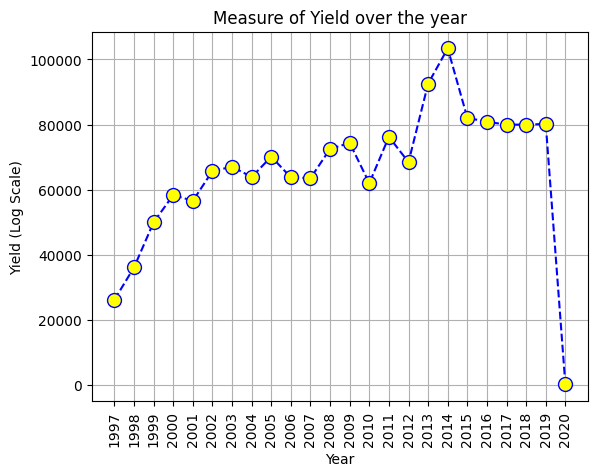

In [ ]:
# Yield trend over the year

df_year= data.groupby('Crop_Year', as_index= False)['Yield'].sum()

plt.plot(df_year['Crop_Year'].astype(str),df_year['Yield'],color='blue', linestyle='dashed',
         marker='o',markersize=10, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield (Log Scale)')
plt.title('Measure of Yield over the year')
plt.xticks(rotation= 90)
plt.grid()
plt.show()

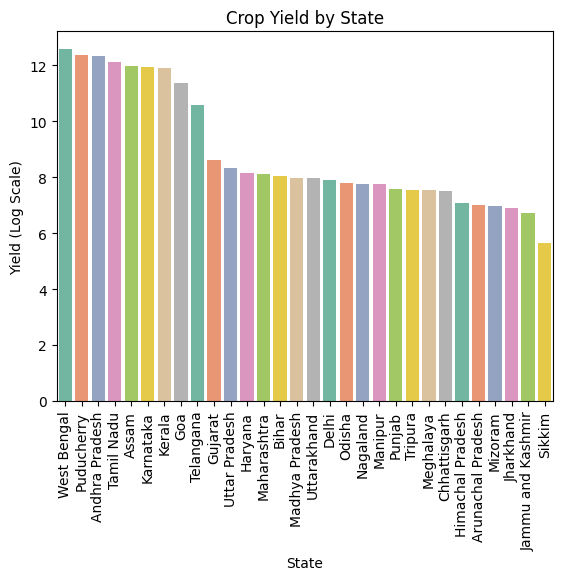

In [ ]:
df_state= yield_df.groupby('State', as_index= False)['Yield'].sum().sort_values(by= 'Yield', ascending= False)

sns.barplot(x= df_state.State, y= np.log1p(df_state.Yield), palette= 'Set2')
plt.xticks(rotation = 90)
plt.ylabel('Yield (Log Scale)')
plt.title('Crop Yield by State')
plt.show()

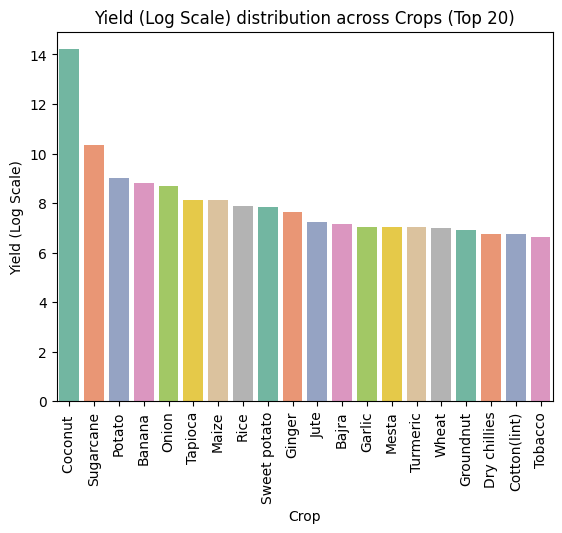

In [ ]:
df_crop= data.groupby('Crop', as_index= False)['Yield'].sum().sort_values(by= 'Yield', ascending= False).head(20)

# plt.figure(figsize= (15, 10))
sns.barplot(x= df_crop.Crop, y= np.log1p(df_crop.Yield), palette= 'Set2')
plt.xticks(rotation = 90)
plt.ylabel('Yield (Log Scale)')
plt.title('Yield (Log Scale) distribution across Crops (Top 20)')
plt.show()

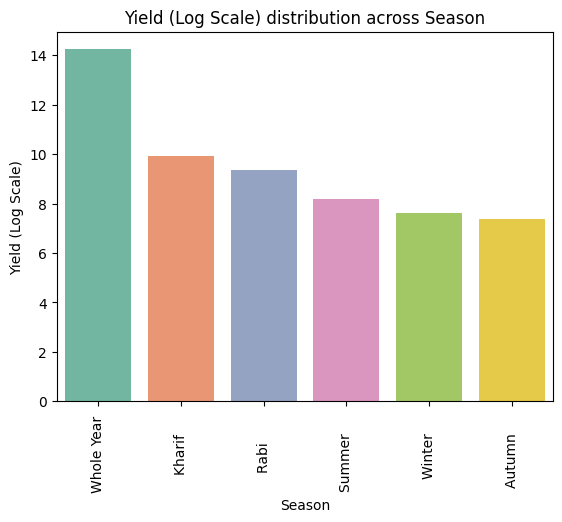

In [ ]:
df_season= data.groupby('Season', as_index= False)['Yield'].sum().sort_values(by= 'Yield', ascending= False).head(20)

# plt.figure(figsize= (15, 10))
sns.barplot(x= df_season.Season, y= np.log1p(df_season.Yield), palette= 'Set2')
plt.xticks(rotation = 90)
plt.ylabel('Yield (Log Scale)')
plt.title('Yield (Log Scale) distribution across Season')
plt.show()

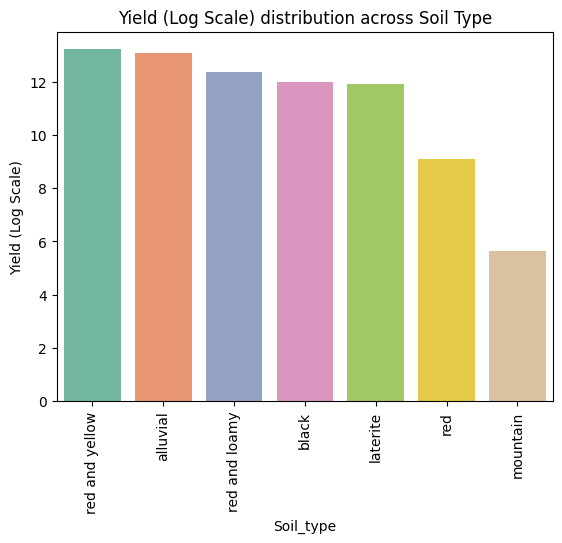

In [ ]:
df_soil= data.groupby('Soil_type', as_index= False)['Yield'].sum().sort_values(by= 'Yield', ascending= False).head(20)

# plt.figure(figsize= (15, 10))
sns.barplot(x= df_soil.Soil_type, y= np.log1p(df_soil.Yield), palette= 'Set2')
plt.xticks(rotation = 90)
plt.ylabel('Yield (Log Scale)')
plt.title('Yield (Log Scale) distribution across Soil Type')
plt.show()

**Insights**

1. The regplot between Annual Rainfall and Yield gives a nearly horizontal line which means there is no meaninful linear relationship between the two variables. The scatter points are widely dispersed, suggesting the features does not explain variations in yield.

2. There is a slight positive slope when analyzing features like Pesticide, Area and Fertilizer. This indicates as Variale X increases, Variable Y also tends to increase.

3. The regplot between Production and Yield shows a moderatately strong positive correlation (r = 0.57)

4. Year 2014 shows highest yield.

5. West Bengal records the highest overall yield among all States

6. Coconut has the highest yield among all crops in the dataset followed by Sugarcane.


In [ ]:
data[num_cols].corr()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,1.00000,-0.03569,0.00337,-0.12994,0.01117,-0.00466,0.00254
Area,-0.03569,1.00000,0.03744,0.04938,0.97326,0.97348,0.00186
Production,0.00337,0.03744,1.00000,0.02319,0.03980,0.03517,0.57081
Annual_Rainfall,-0.12994,0.04938,0.02319,1.00000,0.04474,0.03849,0.02704
Fertilizer,0.01117,0.97326,0.03980,0.04474,1.00000,0.95499,0.00286
Pesticide,-0.00466,0.97348,0.03517,0.03849,0.95499,1.00000,0.00178
Yield,0.00254,0.00186,0.57081,0.02704,0.00286,0.00178,1.00000


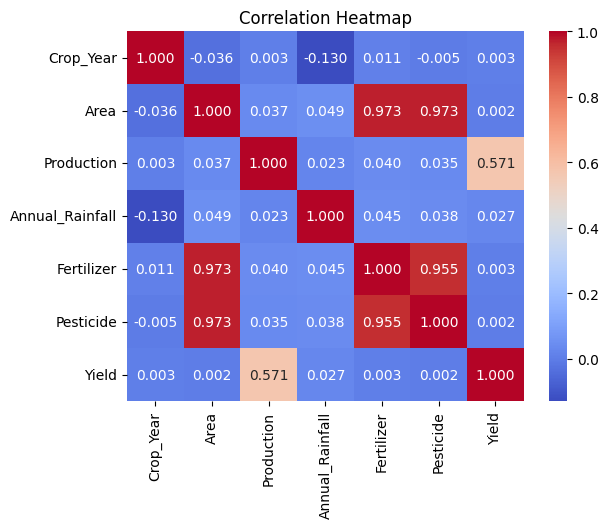

In [ ]:
sns.heatmap(data[num_cols].corr(), annot= True, cmap= 'coolwarm', fmt= '.3f')
plt.title('Correlation Heatmap')
plt.show()

*  The heatmap of numerical variables shows a **strong positive correlation between features Pesticide and Fertilizer, Area and Pesticide, Area and Fertilizer. Can try dropping one of them while modelling** to see if there is any performance improvement.
*  The slight positive slope displayed by features Area, Pesticide and Fertilizer was just noise (r ≈ 0.002). The correlation values shows indicates no meaningful linear relationship.

In [48]:
cat_cols
# Label encoding - ordinal
# One hot encoding - less cardinality - dummy variable
print(data['Crop'].nunique())
print(data['Season'].nunique())
print(data['Soil_type'].nunique())
print(data['State'].nunique())

55
6
7
30


Crop_Year showed almost no linear relationship with Yield (correlation = 0.003). Since the project is not time-series based and year does not causally influence yield, the feature was excluded from modeling to avoid noise and overfitting.

Country has unique value. This unique feature will be irrelevant to the model's predictive performance and can be ignored/dropped.

Feature	  Keep/Drop	Reason	Recommended Encoding <br>
Crop (55)	Target / Frequency Encoding <br>
State (30)	One-hot (tree models) or Target (linear) <br>
Season (6)		One-hot <br>
Soil Type (7)	One-hot

Target Encoding replaces each category with the mean of the target-variable (Yield) of that category <br>
**category_encoders** library

### Bookmark2-Darsana

### Bookmark3-Sneha

### Bookmark4-Ashir